El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.
### Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.


Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

###


### Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.

# Aclaración: Resumen

Característica objetivo: la columna `'EndDate'` es igual a `'No'`.

Métrica principal: AUC-ROC.

Métrica adicional: exactitud.

Criterios de evaluación:

- AUC-ROC < 0.75 — 0 SP
- 0.75 ≤ AUC-ROC < 0.81 — 4 SP
- 0.81 ≤ AUC-ROC < 0.85 — 4.5 SP
- 0.85 ≤ AUC-ROC < 0.87 — 5 SP
- 0.87 ≤ AUC-ROC < 0.88 — 5.5 SP
- AUC-ROC ≥ 0.88 — 6 SP

- **Etapas del proyecto:**
    - Hacer un plan de trabajo.
    - Investigar la tarea.
    - Desarrollar un modelo.
    - Preparar el informe.

# PLAN DE TRABAJO 

El primer paso a realizar es el Análisis Exploratorio de Datos (EDA, por sus siglas en inglés) es una etapa crucial en el proceso de análisis de datos que implica explorar, resumir y visualizar los datos para comprender mejor sus características. 
1. Se realizará un Resumen estadístico inicial: Esto implica calcular estadísticas descriptivas básicas como la media, la mediana, la desviación estándar, el rango, los cuartiles, etc., para cada variable en el conjunto de datos. Esto proporciona una comprensión inicial de la distribución y la variabilidad de los datos.

2. Tratamiento de datos faltantes: Identificar y manejar los valores faltantes en el conjunto de datos. Esto podría implicar imputar valores, eliminar registros o variables con valores faltantes, o utilizar técnicas más avanzadas como la imputación multivariable.

3.Exploración de la distribución de las variables: Visualizar la distribución de las variables utilizando histogramas, diagramas de caja (boxplots), o gráficos de densidad para comprender la forma y la dispersión de los datos.

4. Análisis de correlación: Evaluar la relación entre variables mediante el cálculo de correlaciones y la creación de mapas de calor (heatmaps) de correlación. Esto puede ayudar a identificar posibles relaciones lineales o no lineales entre las variables.

5.Análisis de outliers: Identificar valores atípicos que podrían ser errores de medición o indicativos de comportamiento inusual en los datos. Esto puede hacerse visualmente mediante diagramas de dispersión (scatterplots) o cuantitativamente utilizando técnicas como el método del rango intercuartil (IQR) o el Z-score.

6.Exploración de variables categóricas: Si el conjunto de datos incluye variables categóricas, es importante explorar su distribución y relación con otras variables a través de tablas de frecuencia y gráficos de barras en caso necesario se transformaran en este mismo momento en variables numéricas antes de iniciar a trabajar con los modelos.



En el informe, responde las siguientes preguntas:

- ¿Qué pasos del plan se realizaron y qué pasos se omitieron (explica por qué)?
- ¿Qué dificultades encontraste y cómo lograste resolverlas?
- ¿Cuáles fueron algunos de los pasos clave para resolver la tarea?
- ¿Cuál es tu modelo final y qué nivel de calidad tiene?

Estos son algunos de los criterios utilizados por el líder del equipo:

- ¿Respondiste todas las preguntas y con respuestas claras?

# Inicio
Carga de datos

In [95]:
import math
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

In [96]:
try:
    df_contract = pd.read_csv('/home/rosypc2/Escritorio/PROYECTO FINAL/contract.csv')
    df_personal = pd.read_csv('/home/rosypc2/Escritorio/PROYECTO FINAL/personal.csv')
    df_internet = pd.read_csv('/home/rosypc2/Escritorio/PROYECTO FINAL/internet.csv')
    df_phone = pd.read_csv('/home/rosypc2/Escritorio/PROYECTO FINAL/phone.csv')                

except:
    df_contract = pd.read_csv('../datasets/final_provider/contract.csv')
    df_personal = pd.read_csv('../datasets/final_provider/personal.csv')
    df_internet = pd.read_csv('../datasets/final_provider/internet.csv')
    df_phone = pd.read_csv('../datasets/final_provider/phone.csv')

# Analisis Exploratorio de datos (EDA)
En este apartado realizare un analisis de cada uno de los dataframe que se proporcionaron, realizare las transformaciones necesarias para poder trabajar sin problemas en los modelos

In [97]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [98]:
df_contract.head(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [99]:
df_contract.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


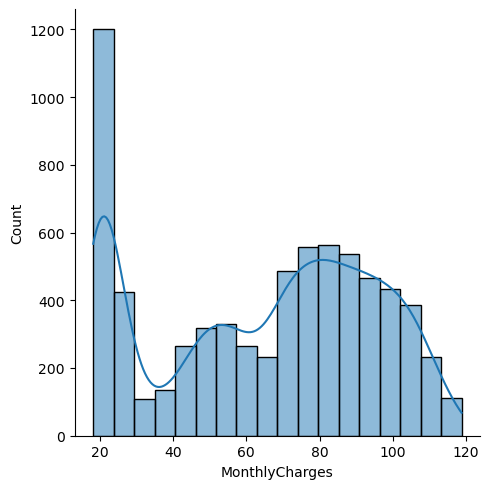

In [100]:
# Creamos la grafica para visualizar la distribución de la variable MonthlyCharges
sns.displot(df_contract['MonthlyCharges'], kde=True)
plt.show()

Primeras observaciones, en este dataframe tenemos dos columnas que nos pueden ayudar a determinar la antiguedad del cliente en la compañia, al restar la fecha en que abandono los servicios de la fecha en que inicio, previo a esto es necesario cambiar el tipo de variable de object a datetime, Ademas es importante observar que nuestra variable objetivo se ubica cuando en la columna "EndDate" se observa un valor de No, lo que nos indica que el cliente no ha dejado la compañia, es conveniente cambiar el nombre de esta columna por el de "Exited" para identificar claramente a nuestra variable objetivo. 
Tambien observamos que la variable MonthlyChargues tiene una distribucion en la que el mayor numero de clientes tiene un gasto mensual de 20, a pesar de que el valor promedio es de 64.7


In [101]:
# Reemplazamos todos los valores 'No' en EndDate column with None, para poder calcular los meses de antiguedad en la empresa y convertir a datetime
df_contract['EndDate'] = np.where(df_contract['EndDate'] == 'No', None, df_contract['EndDate'])

# Cambiamos el tipo de variable
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'], format='%Y-%m-%d')
df_contract['EndDate'] = pd.to_datetime(df_contract['EndDate'], format='%Y-%m-%d')

# Creamos la columna con el número de meses que el cliente ha estado en la compañia
df_contract['MonthsInCompany'] = (df_contract['EndDate'] - df_contract['BeginDate']) / pd.Timedelta(days=30)

# Realizacmos la sustracción y dividimos en el lapso de 30 dias para determinar los meses
df_contract['MonthsInCompany'].fillna((df_contract['EndDate'].max() - df_contract['BeginDate']) / pd.Timedelta(days=30), inplace=True)

# Creamos la columna en donde observamos nuesta variable objetivo
df_contract['Exited'] = df_contract['EndDate'].notna().astype('uint8')

# Eliminamos las columnas que ya no necesitamos
df_contract.drop(['BeginDate', 'EndDate'], axis=1, inplace=True)

In [102]:
df_contract

,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MonthsInCompany,Exited
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,0.000000,0
1,5575-GNVDE,One year,No,Mailed check,56.95,1889.5,33.500000,0
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,2.033333,1
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,44.666667,0
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,2.033333,1
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,One year,Yes,Mailed check,84.80,1990.5,23.300000,0
7039,2234-XADUH,One year,Yes,Credit card (automatic),103.20,7362.9,72.000000,0
7040,4801-JZAZL,Month-to-month,Yes,Electronic check,29.60,346.45,10.200000,0
7041,8361-LTMKD,Month-to-month,Yes,Mailed check,74.40,306.6,4.100000,1


En virtud de que tenemos variables categoricas que nos van a entorpecer el uso de los modelos podemos desde este momento transformar a variables numéricas, en este caso son las variables PaperlessBilling  a la que le aplicare OHE y a las variables Type y PaymentMethod las transformare usando Label Encoding, posteriormente se eliminaran las columans originales.

0    5174
1    1869
Name: Exited, dtype: int64


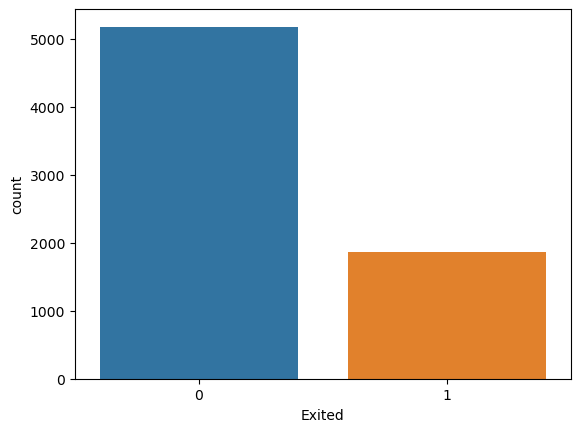

In [103]:
class_counts = df_contract['Exited'].value_counts()

print(class_counts)

sns.countplot(x='Exited', data=df_contract)
plt.show()

Claramente hay un desequilibiro de clases, situación que hay que tomar en cuenta al momento de desarrollar el modelo.

In [104]:
df_contract = pd.get_dummies(df_contract, columns=['PaperlessBilling'], drop_first=True)


In [105]:

label_encoder= LabelEncoder()
df_contract["Type_Encoded"]=label_encoder.fit_transform(df_contract['Type'])
df_contract


,customerID,Type,PaymentMethod,MonthlyCharges,TotalCharges,MonthsInCompany,Exited,PaperlessBilling_Yes,Type_Encoded
0,7590-VHVEG,Month-to-month,Electronic check,29.85,29.85,0.000000,0,1,0
1,5575-GNVDE,One year,Mailed check,56.95,1889.5,33.500000,0,0,1
2,3668-QPYBK,Month-to-month,Mailed check,53.85,108.15,2.033333,1,1,0
3,7795-CFOCW,One year,Bank transfer (automatic),42.30,1840.75,44.666667,0,0,1
4,9237-HQITU,Month-to-month,Electronic check,70.70,151.65,2.033333,1,1,0
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,One year,Mailed check,84.80,1990.5,23.300000,0,1,1
7039,2234-XADUH,One year,Credit card (automatic),103.20,7362.9,72.000000,0,1,1
7040,4801-JZAZL,Month-to-month,Electronic check,29.60,346.45,10.200000,0,1,0
7041,8361-LTMKD,Month-to-month,Mailed check,74.40,306.6,4.100000,1,1,0


In [106]:
label_encoder= LabelEncoder()
df_contract["PaymentMethod_Encoded"]=label_encoder.fit_transform(df_contract['PaymentMethod'])
df_contract


,customerID,Type,PaymentMethod,MonthlyCharges,TotalCharges,MonthsInCompany,Exited,PaperlessBilling_Yes,Type_Encoded,PaymentMethod_Encoded
0,7590-VHVEG,Month-to-month,Electronic check,29.85,29.85,0.000000,0,1,0,2
1,5575-GNVDE,One year,Mailed check,56.95,1889.5,33.500000,0,0,1,3
2,3668-QPYBK,Month-to-month,Mailed check,53.85,108.15,2.033333,1,1,0,3
3,7795-CFOCW,One year,Bank transfer (automatic),42.30,1840.75,44.666667,0,0,1,0
4,9237-HQITU,Month-to-month,Electronic check,70.70,151.65,2.033333,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,One year,Mailed check,84.80,1990.5,23.300000,0,1,1,3
7039,2234-XADUH,One year,Credit card (automatic),103.20,7362.9,72.000000,0,1,1,1
7040,4801-JZAZL,Month-to-month,Electronic check,29.60,346.45,10.200000,0,1,0,2
7041,8361-LTMKD,Month-to-month,Mailed check,74.40,306.6,4.100000,1,1,0,3


In [107]:
df_contract.drop(['Type', 'PaymentMethod'] , axis=1, inplace=True)
df_contract

,customerID,MonthlyCharges,TotalCharges,MonthsInCompany,Exited,PaperlessBilling_Yes,Type_Encoded,PaymentMethod_Encoded
0,7590-VHVEG,29.85,29.85,0.000000,0,1,0,2
1,5575-GNVDE,56.95,1889.5,33.500000,0,0,1,3
2,3668-QPYBK,53.85,108.15,2.033333,1,1,0,3
3,7795-CFOCW,42.30,1840.75,44.666667,0,0,1,0
4,9237-HQITU,70.70,151.65,2.033333,1,1,0,2
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,84.80,1990.5,23.300000,0,1,1,3
7039,2234-XADUH,103.20,7362.9,72.000000,0,1,1,1
7040,4801-JZAZL,29.60,346.45,10.200000,0,1,0,2
7041,8361-LTMKD,74.40,306.6,4.100000,1,1,0,3


Ahora analizaremos el df_personal y realizaremos los cambios pertinentes

In [108]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [109]:
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


En este caso se considera indispensable transformar las variables categoricas gender, Partner y Dependents en variables numéricas y en los tres casos lo realizaré con OHE

In [110]:
df_personal = pd.get_dummies(df_personal, columns=['gender'], drop_first=True)
df_personal = pd.get_dummies(df_personal, columns=['Partner'], drop_first=True)
df_personal = pd.get_dummies(df_personal, columns=['Dependents'], drop_first=True)

df_personal

,customerID,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes
0,7590-VHVEG,0,0,1,0
1,5575-GNVDE,0,1,0,0
2,3668-QPYBK,0,1,0,0
3,7795-CFOCW,0,1,0,0
4,9237-HQITU,0,0,0,0
...,...,...,...,...,...
7038,6840-RESVB,0,1,1,1
7039,2234-XADUH,0,0,1,1
7040,4801-JZAZL,0,0,1,1
7041,8361-LTMKD,1,1,1,0


Continuamos analizando y modificando el df_internet

In [111]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [112]:
df_internet.head

<bound method NDFrame.head of       customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0     7590-VHVEG             DSL             No          Yes               No   
1     5575-GNVDE             DSL            Yes           No              Yes   
2     3668-QPYBK             DSL            Yes          Yes               No   
3     7795-CFOCW             DSL            Yes           No              Yes   
4     9237-HQITU     Fiber optic             No           No               No   
...          ...             ...            ...          ...              ...   
5512  6840-RESVB             DSL            Yes           No              Yes   
5513  2234-XADUH     Fiber optic             No          Yes              Yes   
5514  4801-JZAZL             DSL            Yes           No               No   
5515  8361-LTMKD     Fiber optic             No           No               No   
5516  3186-AJIEK     Fiber optic            Yes           No              Yes  

Observamos que en este dataframe, todas las variables son categoricas y podriamso convertirlas a valores boleanos, pero considero mejor convertiras en valores numericos utilizando OHE, exceptuado el  customerID que posteriormente nos servira de base para unir nuestros dataframes en uno solo.

In [113]:
df_internet = pd.get_dummies(df_internet, columns =['InternetService'], drop_first=True)
df_internet = pd.get_dummies(df_internet, columns=['OnlineSecurity'], drop_first=True)
df_internet = pd.get_dummies(df_internet, columns =['OnlineBackup'], drop_first=True)
df_internet = pd.get_dummies(df_internet, columns=['DeviceProtection'], drop_first=True)
df_internet = pd.get_dummies(df_internet, columns =['TechSupport'], drop_first=True)
df_internet = pd.get_dummies(df_internet, columns=['StreamingTV'], drop_first=True)
df_internet = pd.get_dummies(df_internet, columns =['StreamingMovies'], drop_first=True)
df_internet                                      

,customerID,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,7590-VHVEG,0,0,1,0,0,0,0
1,5575-GNVDE,0,1,0,1,0,0,0
2,3668-QPYBK,0,1,1,0,0,0,0
3,7795-CFOCW,0,1,0,1,1,0,0
4,9237-HQITU,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,0,1,0,1,1,1,1
5513,2234-XADUH,1,0,1,1,0,1,1
5514,4801-JZAZL,0,1,0,0,0,0,0
5515,8361-LTMKD,1,0,0,0,0,0,0


Ahora vamos a analizar el df_phone

In [114]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [115]:
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


En este dataframe lo unico que se debe transformar la columna MultipleLines utilizando OHE

In [116]:
df_phone = pd.get_dummies(df_phone, columns =['MultipleLines'], drop_first=True)
df_phone                                     

,customerID,MultipleLines_Yes
0,5575-GNVDE,0
1,3668-QPYBK,0
2,9237-HQITU,0
3,9305-CDSKC,1
4,1452-KIOVK,1
...,...,...
6356,2569-WGERO,0
6357,6840-RESVB,1
6358,2234-XADUH,1
6359,8361-LTMKD,1


Despues de esta primera revision de los datos podemos determinar que no tenemos datos nulos en ninguno de los dataframes que nos proporcionaron, asimismo existen dos dataframes que tienen el mismo numero de filas que son el que contiene la información de contrato y la que contiene los datos personales de los clintes (df_contact y df_personal), las que se refieren a los servicios tanto de internet como de telefonia son diferentes entre si y tambien con respecto a los otros. 
Tenemos la variable "customerID presente en las 4 tablas, antes de proceder unificar la información en una sola tabla, es conveniente hacer los cambios pertinentes y analizar algunos graficos para tener mayor claridad en la importancia de cada una de las variables.

In [117]:
# Merge all DataFrames into a single DataFrame on the customerID column
df = pd.merge(df_contract, df_personal, on='customerID', how='outer')
df = pd.merge(df, df_internet, on='customerID', how='outer')
df = pd.merge(df, df_phone, on='customerID', how='outer')

# Drop customerID column as it is no longer needed
df = df.drop('customerID', axis=1).reset_index(drop=True)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MonthlyCharges               7043 non-null   float64
 1   TotalCharges                 7043 non-null   object 
 2   MonthsInCompany              7043 non-null   float64
 3   Exited                       7043 non-null   uint8  
 4   PaperlessBilling_Yes         7043 non-null   uint8  
 5   Type_Encoded                 7043 non-null   int64  
 6   PaymentMethod_Encoded        7043 non-null   int64  
 7   SeniorCitizen                7043 non-null   int64  
 8   gender_Male                  7043 non-null   uint8  
 9   Partner_Yes                  7043 non-null   uint8  
 10  Dependents_Yes               7043 non-null   uint8  
 11  InternetService_Fiber optic  5517 non-null   float64
 12  OnlineSecurity_Yes           5517 non-null   float64
 13  OnlineBackup_Yes  

De esta informacion podemos decir que de la columna 12 a la 18 tenemos missing values, los podemos sustituir por "0" y convertir dichas columnas a valores numéricos. 

In [119]:
df_filled = df.fillna(0)
df_filled

,MonthlyCharges,TotalCharges,MonthsInCompany,Exited,PaperlessBilling_Yes,Type_Encoded,PaymentMethod_Encoded,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes
0,29.85,29.85,0.000000,0,1,0,2,0,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,56.95,1889.5,33.500000,0,0,1,3,0,1,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,53.85,108.15,2.033333,1,1,0,3,0,1,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,42.30,1840.75,44.666667,0,0,1,0,0,1,0,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,70.70,151.65,2.033333,1,1,0,2,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.5,23.300000,0,1,1,3,0,1,1,1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
7039,103.20,7362.9,72.000000,0,1,1,1,0,0,1,1,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
7040,29.60,346.45,10.200000,0,1,0,2,0,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7041,74.40,306.6,4.100000,1,1,0,3,1,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [120]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MonthlyCharges               7043 non-null   float64
 1   TotalCharges                 7043 non-null   object 
 2   MonthsInCompany              7043 non-null   float64
 3   Exited                       7043 non-null   uint8  
 4   PaperlessBilling_Yes         7043 non-null   uint8  
 5   Type_Encoded                 7043 non-null   int64  
 6   PaymentMethod_Encoded        7043 non-null   int64  
 7   SeniorCitizen                7043 non-null   int64  
 8   gender_Male                  7043 non-null   uint8  
 9   Partner_Yes                  7043 non-null   uint8  
 10  Dependents_Yes               7043 non-null   uint8  
 11  InternetService_Fiber optic  7043 non-null   float64
 12  OnlineSecurity_Yes           7043 non-null   float64
 13  OnlineBackup_Yes  

In [121]:
df = df_filled

/tmp/ipykernel_1298/2114576269.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


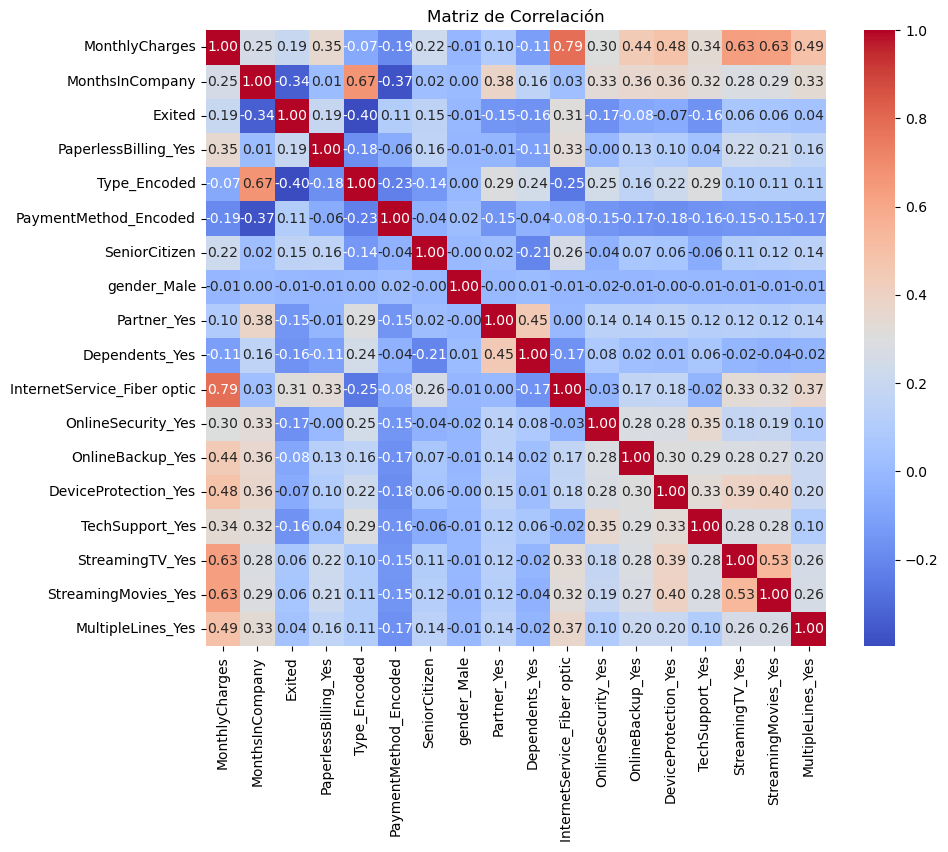

In [122]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

En esta grafica podemos observar que hay variables que se relacionan entre si con un valor alto de correlación como es el servicio de internet con fibra optica  esta directamente relacionado con los carrgos mensuales, y estos a su vez se relaciona fuertemente con la variable Type,asi como con el Type. Asimismo la variable partner se relaciona con la variable dependent, la variable monthlycharges tambien se relaciona con los servicios de streaming que el cliente contrata. Lamentablemente la relacion directa con nuestra varaible objetivo no se aprecia tan claramente. 
Por lo anterior realizare otra exploración para averiaguar con que variables existe una mayor relación

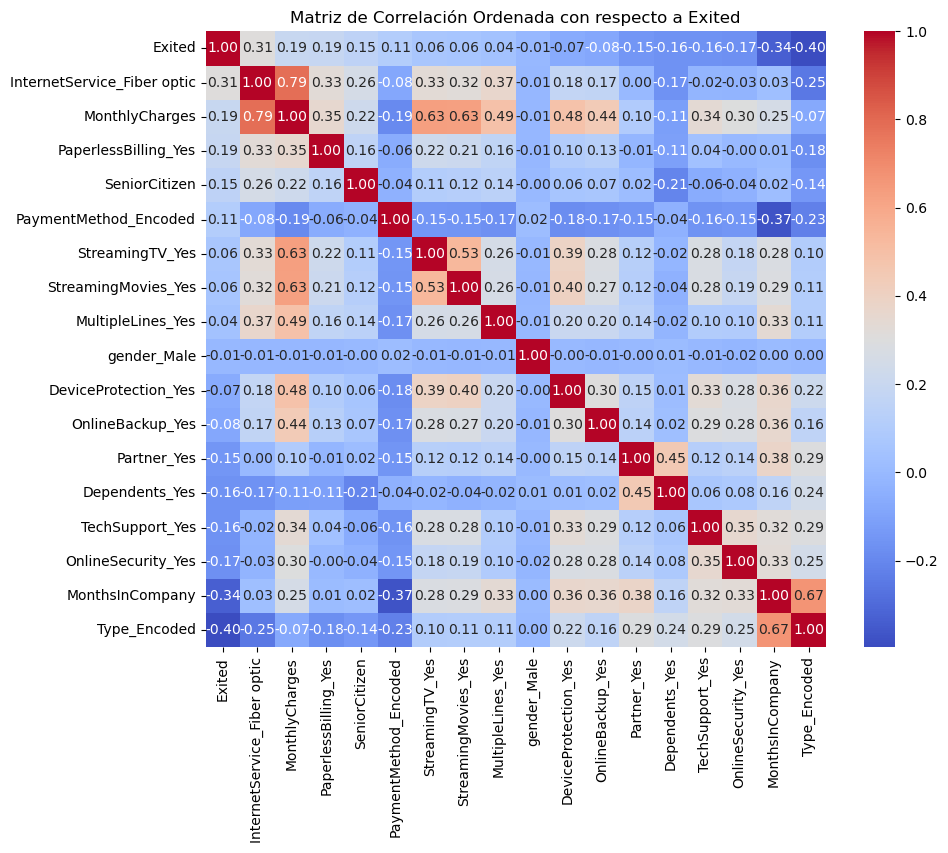

In [123]:
# Seleccionar la fila o columna correspondiente a 'Exited'
correlation_with_Exited = correlation_matrix['Exited']  # Si 'Exited' es una columna
# O
correlation_with_Exited = correlation_matrix.loc['Exited']  # Si 'Exited' es una fila

# Ordenar los valores de correlación
sorted_correlation = correlation_with_Exited.sort_values(ascending=False)

# Crear un nuevo mapa de calor solo con las variables ordenadas
sorted_correlation_matrix = correlation_matrix.loc[sorted_correlation.index, sorted_correlation.index]

# Crear la figura con un tamaño específico
plt.figure(figsize=(10, 8))

# Visualizar la matriz de correlación ordenada como un mapa de calor
sns.heatmap(sorted_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Agregar título
plt.title('Matriz de Correlación Ordenada con respecto a Exited')

# Mostrar el mapa de calor
plt.show()


In [124]:
# Convertir el diccionario a un DataFrame
df_resultados = pd.DataFrame(sorted_correlation_matrix)

# Imprimir el DataFrame
print(df_resultados)

                               Exited  InternetService_Fiber optic  \
Exited                       1.000000                     0.308020   
InternetService_Fiber optic  0.308020                     1.000000   
MonthlyCharges               0.193356                     0.787066   
PaperlessBilling_Yes         0.191825                     0.326853   
SeniorCitizen                0.150889                     0.255338   
PaymentMethod_Encoded        0.107062                    -0.083868   
StreamingTV_Yes              0.063228                     0.329349   
StreamingMovies_Yes          0.061382                     0.322923   
MultipleLines_Yes            0.040102                     0.366083   
gender_Male                 -0.008612                    -0.011286   
DeviceProtection_Yes        -0.066160                     0.176049   
OnlineBackup_Yes            -0.082255                     0.165651   
Partner_Yes                 -0.150448                     0.000304   
Dependents_Yes      

Como se puede apreciar en los resultados anteriores, la correlacion de la variable objetivo "Exited" con las demas variables no presenta valores muy altos, sin embargo se pueden determinar variables en las que la correlación es menor a cero, lo cual me indica que no existe influencia de ellas en que el cliente decida dejar la compañia, en consecuencia, tomare la decision de eliminarlas del dataframe para poder desarrollar el modelo.

In [125]:
# Drop the following columns as they are not relevant to the prediction of Churn or they are highly correlated with other columns
cols = ["gender_Male",                  
"StreamingTV_Yes",             
"StreamingMovies_Yes",          
"Partner_Yes",                  
"Dependents_Yes",              
"DeviceProtection_Yes",          
"OnlineBackup_Yes",              
"TechSupport_Yes",               
"OnlineSecurity_Yes",             
"MonthsInCompany",                
"Type_Encoded",                
]

df.drop(cols, axis=1, inplace=True)

# Print the general/summary information about the DataFrames
df.info()

# Print a random sample of 5 rows from the DataFrame
df.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MonthlyCharges               7043 non-null   float64
 1   TotalCharges                 7043 non-null   object 
 2   Exited                       7043 non-null   uint8  
 3   PaperlessBilling_Yes         7043 non-null   uint8  
 4   PaymentMethod_Encoded        7043 non-null   int64  
 5   SeniorCitizen                7043 non-null   int64  
 6   InternetService_Fiber optic  7043 non-null   float64
 7   MultipleLines_Yes            7043 non-null   float64
dtypes: float64(3), int64(2), object(1), uint8(2)
memory usage: 344.0+ KB


,MonthlyCharges,TotalCharges,Exited,PaperlessBilling_Yes,PaymentMethod_Encoded,SeniorCitizen,InternetService_Fiber optic,MultipleLines_Yes
4232,69.95,69.95,1,1,3,0,1.0,0.0
5893,24.00,269.65,0,1,0,0,0.0,1.0
1627,75.90,866.4,0,1,3,0,1.0,0.0
5580,19.95,1004.5,0,0,0,0,0.0,0.0
725,21.25,204.55,0,1,3,1,0.0,0.0


Con este resultado tambien considero necesario eliminar la columna Total Charges en primer lugar porque esta definida como un object y en segundo lugar porque los cargos mensuales nos proporcionan la información que se requiere para el proceso de modelado. Asimismo es necesario estandarizar todos los valores numéricos. Utilizare StandardScaler

In [126]:
df= df.drop('TotalCharges',axis=1)

In [127]:
df = pd.get_dummies(df, columns=['Exited'], drop_first=True)


In [128]:
# Creando el objeto 
scaler = StandardScaler()

# Aplicar el escalado estándar a todas las columnas del DataFrame
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Persisitiendo los cambios en el df
df=df_scaled
df

,MonthlyCharges,PaperlessBilling_Yes,PaymentMethod_Encoded,SeniorCitizen,InternetService_Fiber optic,MultipleLines_Yes,Exited_1
0,-1.160323,0.829798,0.398558,-0.439916,-0.885660,-0.854176,-0.601023
1,-0.259629,-1.205113,1.334863,-0.439916,-0.885660,-0.854176,-0.601023
2,-0.362660,0.829798,1.334863,-0.439916,-0.885660,-0.854176,1.663829
3,-0.746535,-1.205113,-1.474052,-0.439916,-0.885660,-0.854176,-0.601023
4,0.197365,0.829798,0.398558,-0.439916,1.129102,-0.854176,1.663829
...,...,...,...,...,...,...,...
7038,0.665992,0.829798,1.334863,-0.439916,-0.885660,1.170719,-0.601023
7039,1.277533,0.829798,-0.537747,-0.439916,1.129102,1.170719,-0.601023
7040,-1.168632,0.829798,0.398558,-0.439916,-0.885660,-0.854176,-0.601023
7041,0.320338,0.829798,1.334863,2.273159,1.129102,1.170719,1.663829


# CONSTRUCCION DEL MODELO IDEAL

In [154]:
# Adjust the class imbalance by oversampling the minority class
df_majority = df[df['Exited_1'] == 0]
df_minority = df[df['Exited_1'] == 1]
df_minority_upsampled = df_minority.sample(df_majority.shape[0], replace=True,  random_state=12345)
df = pd.concat([df_majority, df_minority_upsampled]).sample(frac=1, random_state=12345).reset_index(drop=True)



## Segmentación de los Datos

In [158]:
features = df.drop("Exited_1", axis=1)
target = df["Exited_1"]

In [159]:
# Dividiendo los datos
features_train, features_valid_test, target_train, target_valid_test = train_test_split(features, target, test_size=.4, random_state= 12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid_test, target_valid_test, test_size=.5, random_state=12345)

ValueError: With n_samples=0, test_size=0.4 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

## Encontrar los mejores hiperparametros

In [131]:
#Definiendo la metrica principal que nos solicita el cliente
scoring = 'roc_auc'

In [132]:
# Creando una funcion para elegir los mejores hiperparametros
def find_best_params(models, train_features, train_targets, scoring):
    # Creación de un DataFrame para almacenar los resultados obtenidos
    results = pd.DataFrame(columns=['Model', 'Best Parameters', 'Best Score'])

    # Iteración sobre la lista de modelos
    for model in models:
        # Imprimir el nombre del modelo
        print(f"Encontrando los mejores parametros para {type(model['model']).__name__}...")

        # Utilizando grid search para la busqueda
        grid = GridSearchCV(model['model'], model['param_grid'], cv=5, scoring=scoring, verbose=0, n_jobs=-1)
        grid.fit(train_features, train_targets)

        # Obteniendo los mejores parametros y el score
        best_params = grid.best_params_
        best_score = np.abs(grid.best_score_)

        # Almacenando los resultados en el DataFrame
        results = pd.concat([results, pd.DataFrame({'Model': type(model['model']).__name__, 
                                  'Best Parameters': [best_params], 
                                  'Best Score': best_score})], ignore_index=True)

        # Ordenando los resultados
        results.sort_values(by='Best Score', ascending=False, inplace=True)

    # Creando una grafica para visualizar los resultados
    plt.figure(figsize=(12, 10))
    sns.barplot(data=results, x='Model', y='Best Score', palette="coolwarm")
    plt.title("Grid Search Results")
    plt.xticks(rotation=45)
    plt.tight_layout()

    return results

In [133]:
print(target_train.dtype)

float64


In [134]:
label_encoder = LabelEncoder()
target_train_discrete = label_encoder.fit_transform(target_train)

In [135]:
print(target_train_discrete.dtype)

int64


In [136]:
target_train =target_train_discrete

Encontrando los mejores parametros para RandomForestClassifier...
Encontrando los mejores parametros para DecisionTreeClassifier...
Encontrando los mejores parametros para GradientBoostingClassifier...
Encontrando los mejores parametros para KNeighborsClassifier...


,Model,Best Parameters,Best Score
0,RandomForestClassifier,"{'max_depth': 5, 'n_estimators': 150}",0.775121
1,GradientBoostingClassifier,"{'max_depth': 3, 'n_estimators': 50}",0.773598
2,DecisionTreeClassifier,{'max_depth': 5},0.752440
3,KNeighborsClassifier,{'n_neighbors': 10},0.735766


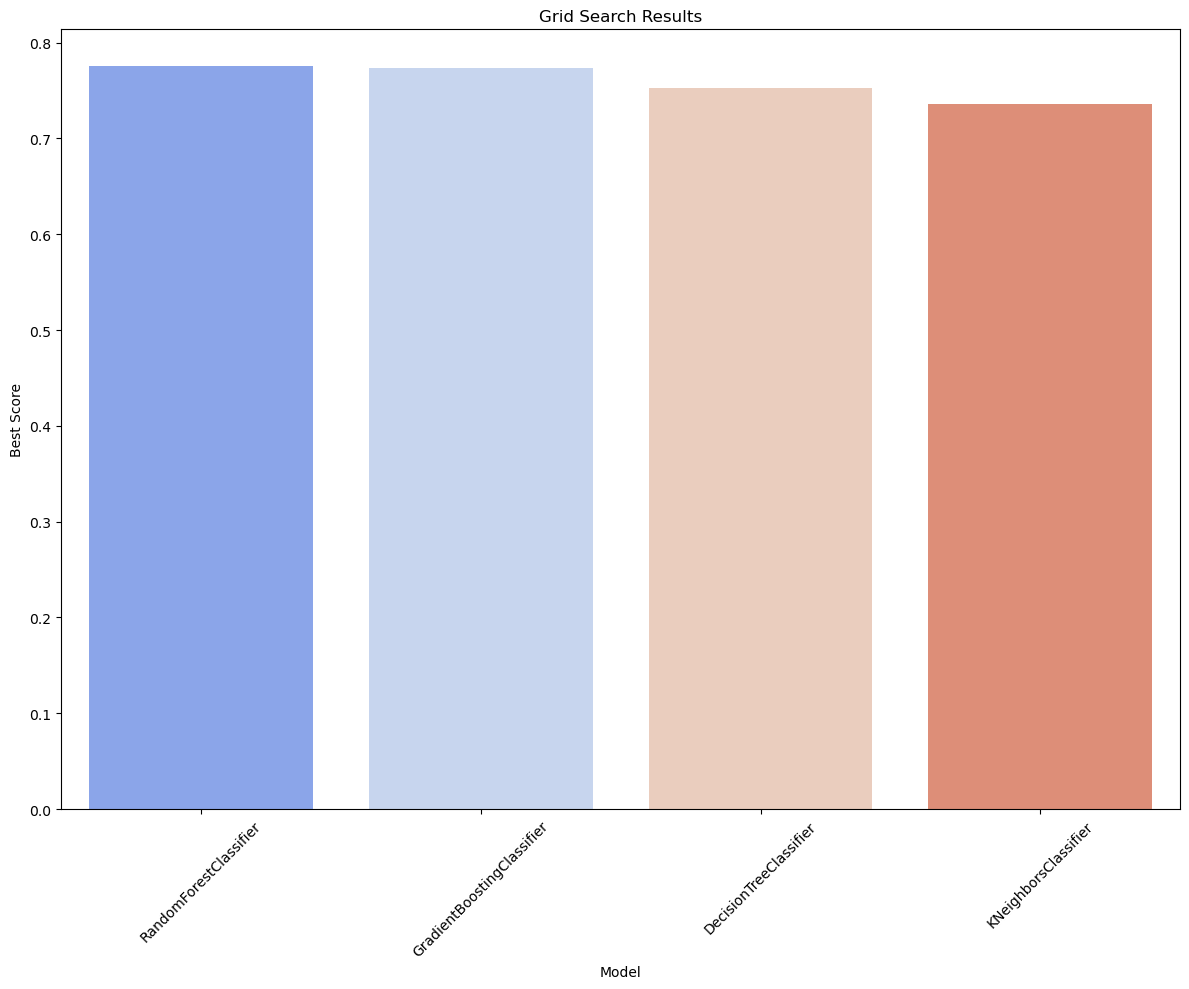

In [137]:
# Define the models and their basic hyperparameters
models = [
    {
        'model': RandomForestClassifier(random_state= 12345, class_weight='balanced'),
        'param_grid': {'n_estimators': np.arange(50, 201, 50), 'max_depth': np.arange(3, 15)}
    },
    {
        'model': DecisionTreeClassifier(random_state=12345, class_weight='balanced'),
        'param_grid': {'max_depth': np.arange(3, 15)}
    },
    {
        'model': GradientBoostingClassifier(random_state=12345),
        'param_grid': {'n_estimators': np.arange(50, 201, 50), 'max_depth': np.arange(3, 15)}
    },
    {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': np.arange(1, 11)}
    },
]

# Encontrando los mejores parametros para cada modelo
results = find_best_params(models, features_train, target_train, scoring)

# Imprimir los resultados
results

In [138]:
# Set the index of the DataFrame to the model name
results.set_index('Model', inplace=True)

# Set the hyperparameters for each model based on the results of the grid search
models = [
    RandomForestClassifier(random_state=12345, **results.loc['RandomForestClassifier']['Best Parameters']),
    DecisionTreeClassifier(random_state=12345, **results.loc['DecisionTreeClassifier']['Best Parameters']),
    GradientBoostingClassifier(random_state=12345, **results.loc['GradientBoostingClassifier']['Best Parameters']),
    KNeighborsClassifier(**results.loc['KNeighborsClassifier']['Best Parameters']),
]

# Entrenar y evaluar los modelos

In [139]:
# Create a function to train and evaluate multiple models on the training and validation subsets and create a graph to visualize the results
def train_and_evaluate_models(models, features_train, target_train, features_valid, target_valid):
    # Create a DataFrame to store the results
    results = pd.DataFrame(columns=['Model', 'Accuracy', 'F1', 'Precision', 'Recall', 'ROC_AUC'])
    
    # Loop through each model
    for model in models:
        # Train the model
        model.fit(features_train, target_train)
        
        # Make predictions
        predictions = model.predict(features_valid)
        
        # Evaluate the model
        accuracy = model.score(features_valid, target_valid)
        f1 = f1_score(target_valid, predictions)
        precision = precision_score(target_valid, predictions)
        recall = recall_score(target_valid, predictions)
        roc_auc = roc_auc_score(target_valid, predictions)
        
        # Append the results to the DataFrame
        results = pd.concat([results, pd.DataFrame({'Model': model.__class__.__name__, 'Accuracy': accuracy, 'F1': f1, 'Precision': precision, 'Recall': recall, 'ROC_AUC': roc_auc}, index=[0])], ignore_index=True)
    
    # Draw a heatmap to visualize the results
    plt.figure(figsize=(14,7))
    sns.set(style="whitegrid")
    sns.heatmap(results.set_index('Model'), annot=True, cmap='RdBu_r')
    plt.title('Model Comparison')
    plt.ylabel('Model')
    plt.tight_layout()
    plt.show()

    return results

In [141]:
print(target_valid.dtype)

float64


In [142]:
label_encoder = LabelEncoder()
target_valid_discrete = label_encoder.fit_transform(target_valid)

In [143]:
print(target_valid_discrete.dtype)

int64


In [144]:
target_valid = target_valid_discrete

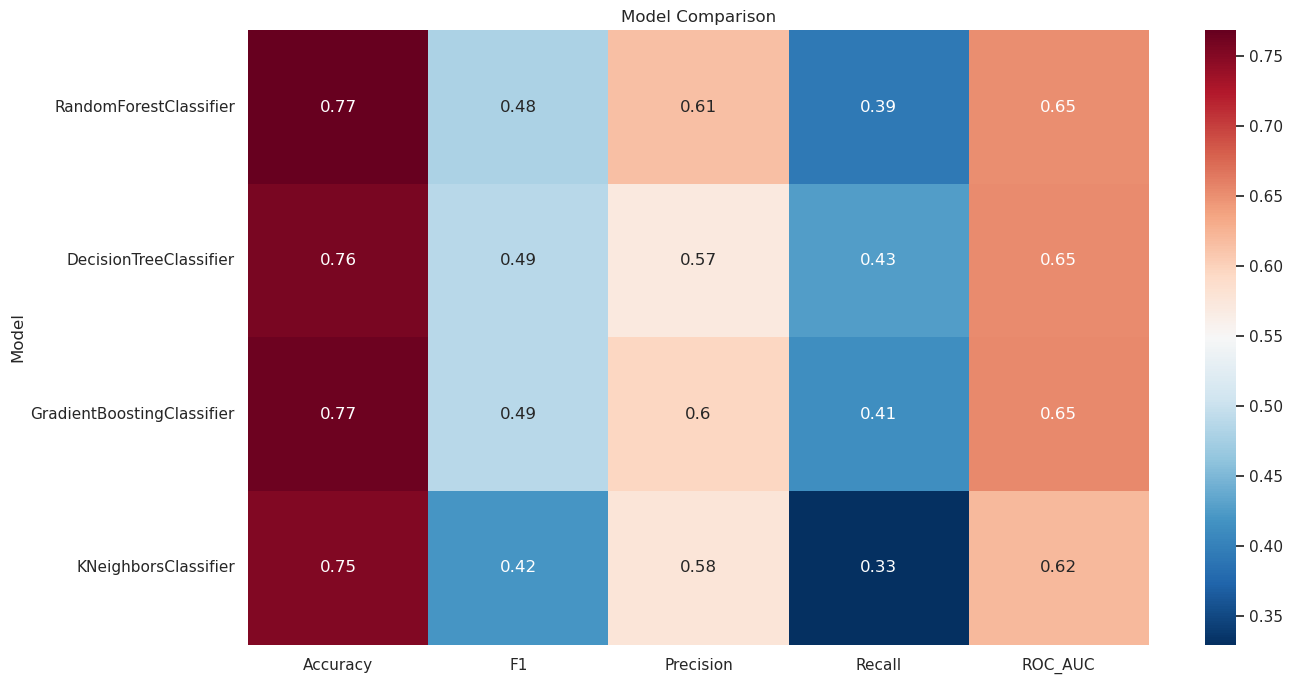

,Model,Accuracy,F1,Precision,Recall,ROC_AUC
0,RandomForestClassifier,0.768630,0.479233,0.614754,0.392670,0.650571
1,DecisionTreeClassifier,0.757275,0.488024,0.569930,0.426702,0.653468
2,GradientBoostingClassifier,0.765082,0.488408,0.596226,0.413613,0.654713
3,KNeighborsClassifier,0.753016,0.420000,0.577982,0.329843,0.620131


In [145]:
# Train and evaluate the models
train_results = train_and_evaluate_models(models, features_train, target_train, features_valid, target_valid)

# Print the results
train_results

In [148]:
label_encoder = LabelEncoder()
target_test_discrete = label_encoder.fit_transform(target_test)
target_test = target_test_discrete

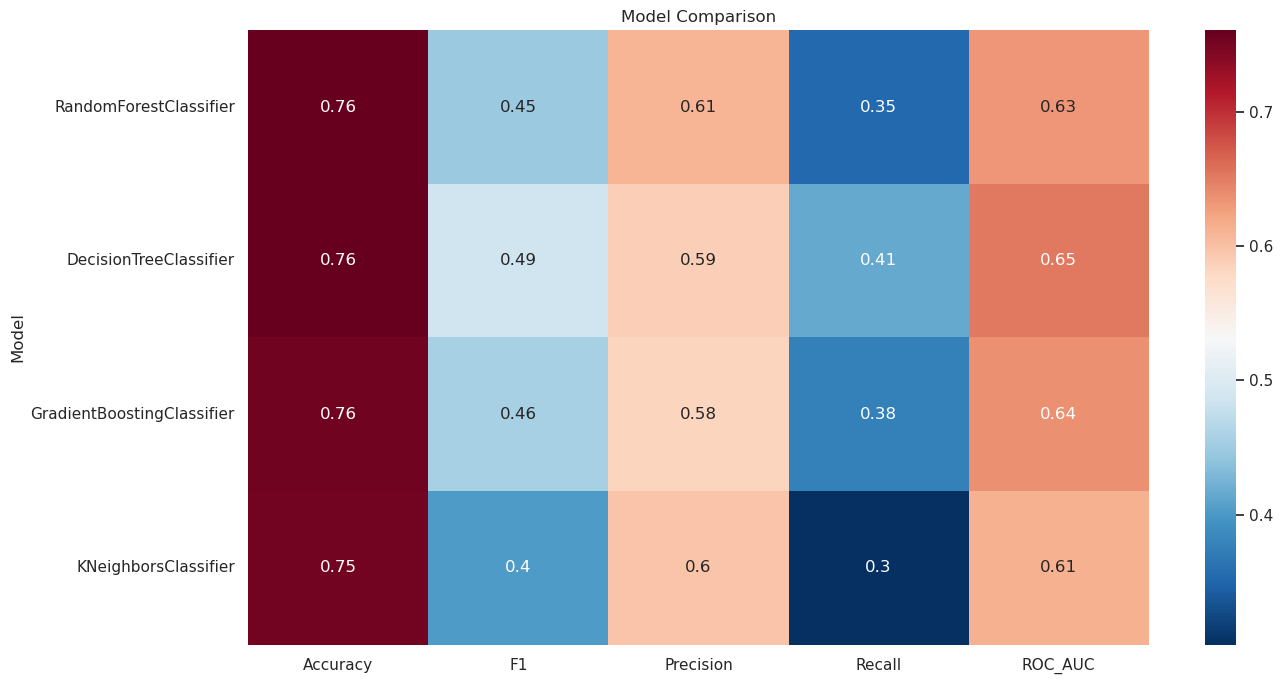

,Model,Accuracy,F1,Precision,Recall,ROC_AUC
0,RandomForestClassifier,0.760823,0.446634,0.609865,0.352332,0.633644
1,DecisionTreeClassifier,0.760114,0.486322,0.588235,0.414508,0.652513
2,GradientBoostingClassifier,0.755145,0.456693,0.582329,0.375648,0.636993
3,KNeighborsClassifier,0.753016,0.402062,0.596939,0.303109,0.612942


In [149]:
# Train and evaluate the models on the test set
test_results = train_and_evaluate_models(models, features_train, target_train, features_test, target_test)

# Print the results
test_results